<a href="https://colab.research.google.com/github/HackTheDataUH25/data_science_challenge_2025/blob/main/Hackathon_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ==========================================================
# Hackathon
# Dataset A – Flu Vaccine Prediction Challenge
# Team: HackTheDataUH25 | University of Hertfordshire
# ==========================================================

In [1]:
# -------------------------------
# 1️ Import Required Libraries
# -------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for better visibility
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='Set2')

In [2]:
# -------------------------------
# 2️ Load the Datasets from GitHub
# -------------------------------

train_url = "https://raw.githubusercontent.com/HackTheDataUH25/data_science_challenge_2025/main/dataset_A_training.csv"
test_url  = "https://raw.githubusercontent.com/HackTheDataUH25/data_science_challenge_2025/main/dataset_A_testing.csv"

train_df = pd.read_csv(train_url)
test_df  = pd.read_csv(test_url)

print(" Data successfully loaded.")
print(f"Train shape: {train_df.shape}")
print(f"Test  shape: {test_df.shape}")

 Data successfully loaded.
Train shape: (4756, 31)
Test  shape: (4749, 30)


In [3]:
# -------------------------------
# 3️ Initial Inspection
# -------------------------------

print("\n Columns Overview:")
print("Train Columns:", list(train_df.columns))
print("Test  Columns:", list(test_df.columns))

print("\n Target column present in train?", 'seasonal_vaccine' in train_df.columns)
print(" Target column present in test? ", 'seasonal_vaccine' in test_df.columns)

# Verify unique respondent IDs
for label, df in [("Train", train_df), ("Test", test_df)]:
    if "respondent_id" in df.columns:
        unique_count = df["respondent_id"].nunique()
        print(f"{label}: respondent_id unique? {unique_count == len(df)} "
              f"({unique_count} unique / {len(df)} rows)")

# Quick preview
display(train_df.head())


 Columns Overview:
Train Columns: ['respondent_id', 'flu_concern', 'flu_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa', 'household_adults', 'household_children', 'employment_sector', 'seasonal_vaccine']
Test  Columns: ['respondent_id', 'flu_concern', 'flu_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'hea

,respondent_id,flu_concern,flu_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,employment_sector,seasonal_vaccine
0,1,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,2.0,18 - 34 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,Non-MSA,0.0,0.0,entertainment,0
1,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,4.0,18 - 34 Years,Some College,White,Male,NaN,Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,real_estate,0
2,3,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0,65+ Years,College Graduate,White,Male,"> $75,000",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,NaN,0
3,4,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,1.0,3.0,3.0,1.0,55 - 64 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,2.0,utilities,1
4,5,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,3.0,1.0,1.0,55 - 64 Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Not Principle City",2.0,0.0,NaN,0


In [4]:
# -------------------------------
# 4️ Data Types & Summary Stats
# -------------------------------
print("\n Dataset Info:")
print(train_df.info())

print("\n Summary Statistics (Numerical Features):")
display(train_df.describe().T)

# Target distribution
if "seasonal_vaccine" in train_df.columns:
    target_counts = train_df["seasonal_vaccine"].value_counts()
    target_percent = (target_counts / len(train_df) * 100).round(2)
    target_summary = pd.DataFrame({"count": target_counts, "percent": target_percent})
    print("\n Target Variable Distribution:")
    display(target_summary)


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                4756 non-null   int64  
 1   flu_concern                  4744 non-null   float64
 2   flu_knowledge                4733 non-null   float64
 3   behavioral_antiviral_meds    4742 non-null   float64
 4   behavioral_avoidance         4724 non-null   float64
 5   behavioral_face_mask         4753 non-null   float64
 6   behavioral_wash_hands        4748 non-null   float64
 7   behavioral_large_gatherings  4747 non-null   float64
 8   behavioral_outside_home      4747 non-null   float64
 9   behavioral_touch_face        4737 non-null   float64
 10  doctor_recc_seasonal         4435 non-null   float64
 11  chronic_med_condition        4568 non-null   float64
 12  child_under_6_months         4604 non-null   float64
 13  he

,count,mean,std,min,25%,50%,75%,max
respondent_id,4756.0,2378.500000,1373.083270,1.0,1189.75,2378.5,3567.25,4756.0
flu_concern,4744.0,1.643128,0.919810,0.0,1.00,2.0,2.00,3.0
flu_knowledge,4733.0,1.293049,0.618902,0.0,1.00,1.0,2.00,2.0
behavioral_antiviral_meds,4742.0,0.052299,0.222652,0.0,0.00,0.0,0.00,1.0
behavioral_avoidance,4724.0,0.734124,0.441846,0.0,0.00,1.0,1.00,1.0
behavioral_face_mask,4753.0,0.073848,0.261551,0.0,0.00,0.0,0.00,1.0
behavioral_wash_hands,4748.0,0.836563,0.369803,0.0,1.00,1.0,1.00,1.0
behavioral_large_gatherings,4747.0,0.365494,0.481619,0.0,0.00,0.0,1.00,1.0
behavioral_outside_home,4747.0,0.336634,0.472608,0.0,0.00,0.0,1.00,1.0
behavioral_touch_face,4737.0,0.688410,0.463192,0.0,0.00,1.0,1.00,1.0



 Target Variable Distribution:


,count,percent
seasonal_vaccine,,
1,2551,53.64
0,2205,46.36



 Missing Values in TRAIN:


,missing_count,missing_pct
employment_sector,2314,48.65
health_insurance,1925,40.48
income_poverty,790,16.61
rent_or_own,381,8.01
doctor_recc_seasonal,321,6.75
education,270,5.68
employment_status,269,5.66
marital_status,265,5.57
chronic_med_condition,188,3.95
child_under_6_months,152,3.20



 Missing Values in TEST:


,missing_count,missing_pct
employment_sector,2405,50.64
health_insurance,1982,41.74
income_poverty,797,16.78
rent_or_own,379,7.98
doctor_recc_seasonal,345,7.26
employment_status,277,5.83
education,269,5.66
marital_status,269,5.66
chronic_med_condition,168,3.54
child_under_6_months,155,3.26


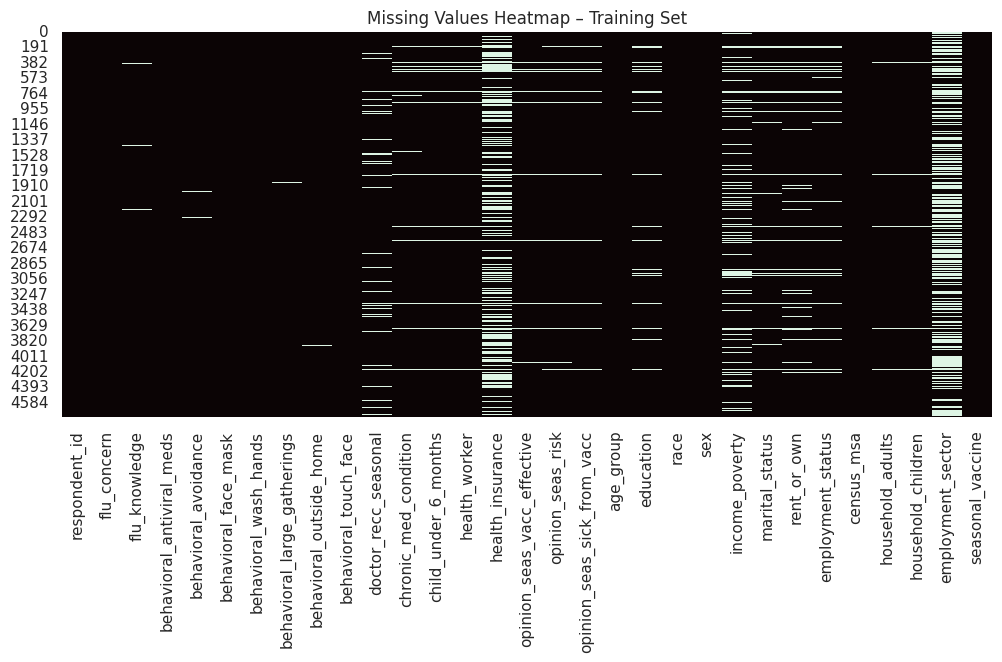

In [5]:
# -------------------------------
# 5️ Missing Value Analysis
# -------------------------------
def missing_summary(df):
    missing = df.isna().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    pct = (missing / len(df) * 100).round(2)
    return pd.DataFrame({"missing_count": missing, "missing_pct": pct})

print("\n Missing Values in TRAIN:")
display(missing_summary(train_df))

print("\n Missing Values in TEST:")
display(missing_summary(test_df))

# Visualize missing data pattern
plt.figure(figsize=(12,5))
sns.heatmap(train_df.isnull(), cbar=False, cmap="mako")
plt.title("Missing Values Heatmap – Training Set")
plt.show()

In [6]:
# -------------------------------
# 6️ Duplicate & Cardinality Check
# -------------------------------

print("\n Duplicate Row Check:")
print(f"Train duplicates: {train_df.duplicated().sum()}")
print(f"Test duplicates : {test_df.duplicated().sum()}")

print("\n Unique Value Count per Column:")
unique_counts = train_df.nunique().sort_values(ascending=False)
display(unique_counts)


 Duplicate Row Check:
Train duplicates: 0
Test duplicates : 0

 Unique Value Count per Column:


,0
respondent_id,4756
employment_sector,21
opinion_seas_vacc_effective,5
opinion_seas_risk,5
opinion_seas_sick_from_vacc,5
age_group,5
flu_concern,4
race,4
household_adults,4
education,4


In [7]:
# -------------------------------
# 7️ Key Categorical Distributions
# -------------------------------

key_cats = ['age_group', 'education', 'race', 'sex', 'marital_status',
            'rent_or_own', 'employment_status', 'employment_sector']

for col in key_cats:
    if col in train_df.columns:
        print(f"\n--- {col} ---")
        print(train_df[col].value_counts(dropna=False).head(10))



--- age_group ---
age_group
65+ Years        1169
55 - 64 Years     999
18 - 34 Years     960
45 - 54 Years     931
35 - 44 Years     697
Name: count, dtype: int64

--- education ---
education
College Graduate    1879
Some College        1209
12 Years             992
< 12 Years           406
NaN                  270
Name: count, dtype: int64

--- race ---
race
White                3766
Black                 362
Other or Multiple     317
Hispanic              311
Name: count, dtype: int64

--- sex ---
sex
Female    2783
Male      1973
Name: count, dtype: int64

--- marital_status ---
marital_status
Married        2403
Not Married    2088
NaN             265
Name: count, dtype: int64

--- rent_or_own ---
rent_or_own
Own     3292
Rent    1083
NaN      381
Name: count, dtype: int64

--- employment_status ---
employment_status
Employed              2467
Not in Labor Force    1786
NaN                    269
Unemployed             234
Name: count, dtype: int64

--- employment_sector ---
empl

/tmp/ipython-input-134093127.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='seasonal_vaccine', data=train_df, palette="Set2")


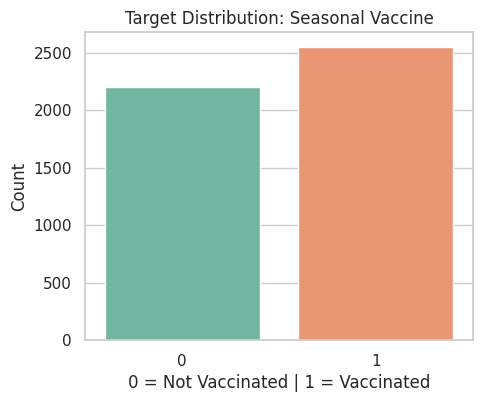

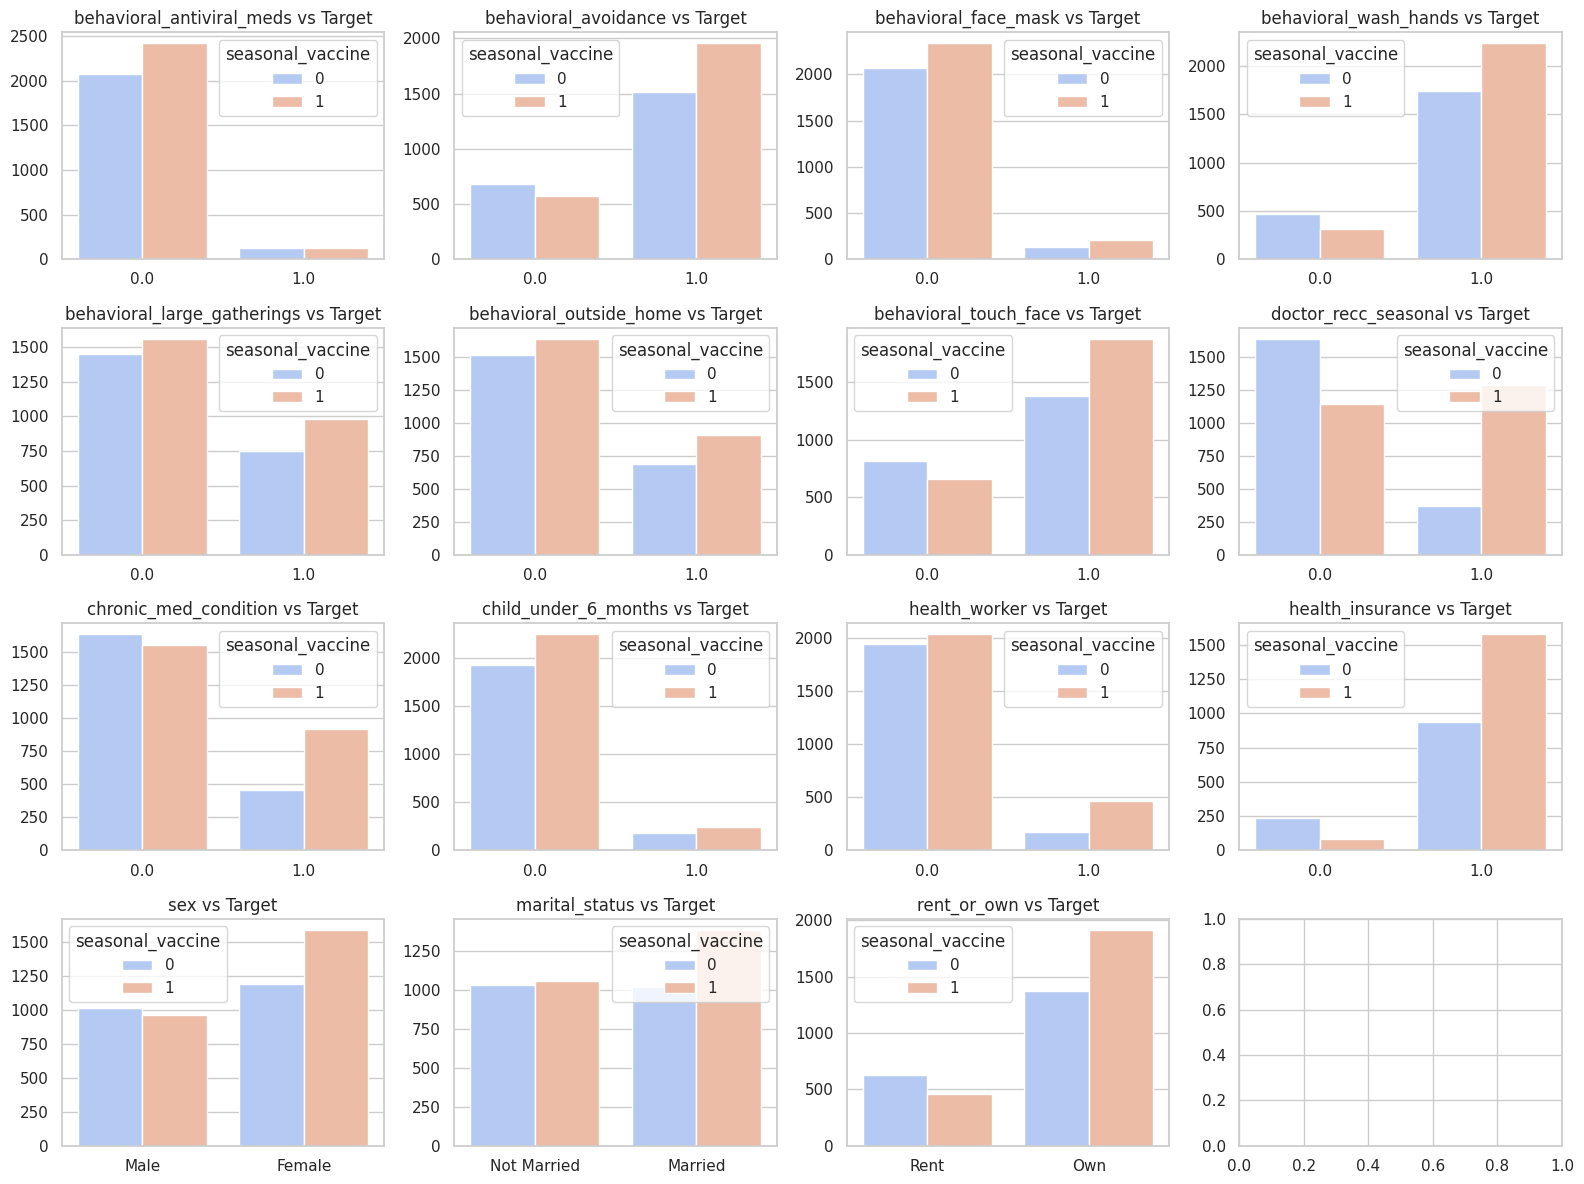

In [8]:
# -------------------------------
# 8️ Visual EDA – Target & Binary Features
# -------------------------------

# --- Target Distribution
plt.figure(figsize=(5,4))
sns.countplot(x='seasonal_vaccine', data=train_df, palette="Set2")
plt.title("Target Distribution: Seasonal Vaccine")
plt.xlabel("0 = Not Vaccinated | 1 = Vaccinated")
plt.ylabel("Count")
plt.show()

# --- Binary Behavioral Features
binary_cols = [col for col in train_df.columns
               if train_df[col].nunique() == 2 and col not in ['seasonal_vaccine','respondent_id']]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16,12))
axes = axes.flatten()

for i, col in enumerate(binary_cols[:16]):
    sns.countplot(x=col, hue='seasonal_vaccine', data=train_df, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f"{col} vs Target")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
plt.tight_layout()
plt.show()


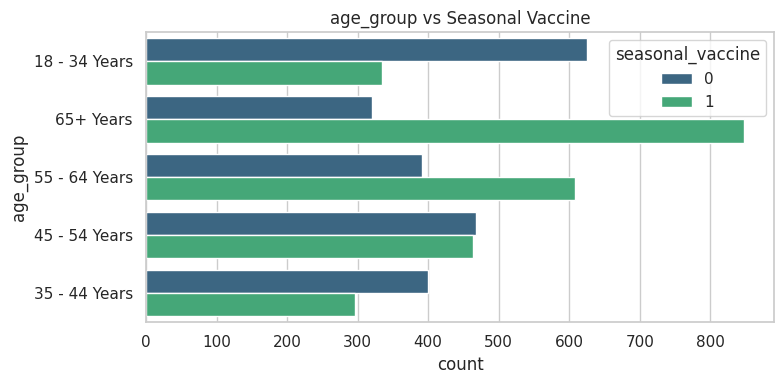

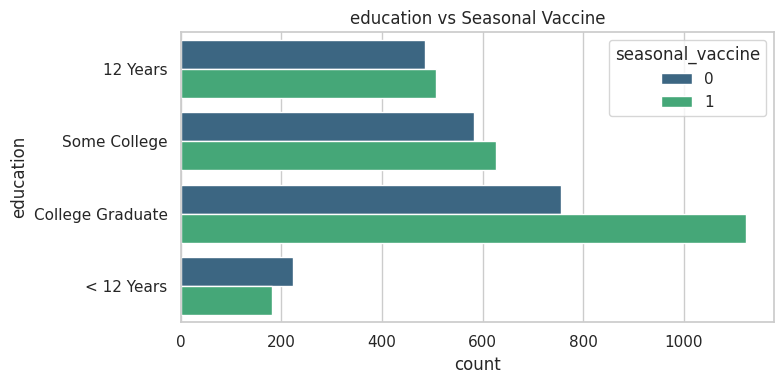

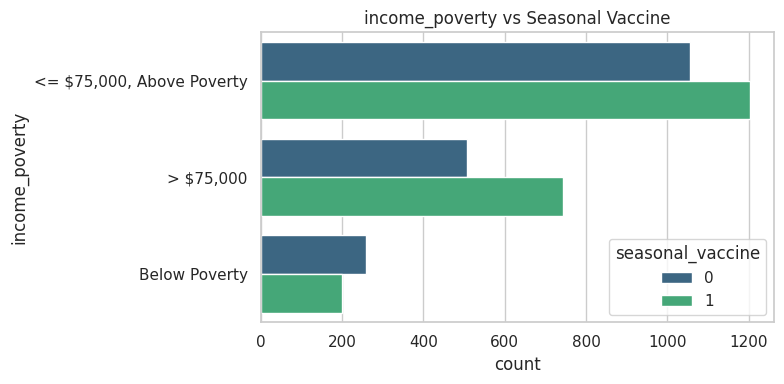

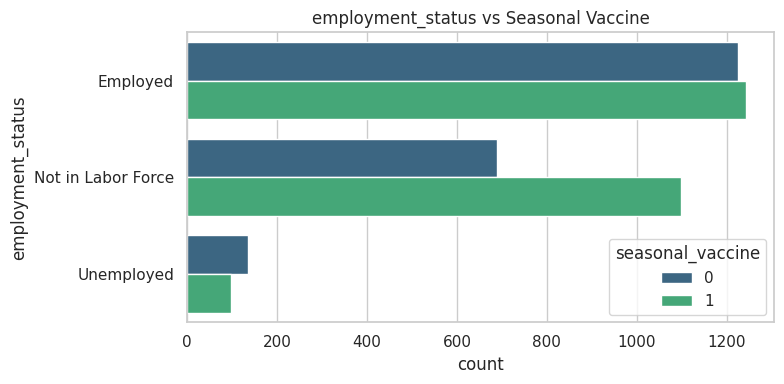

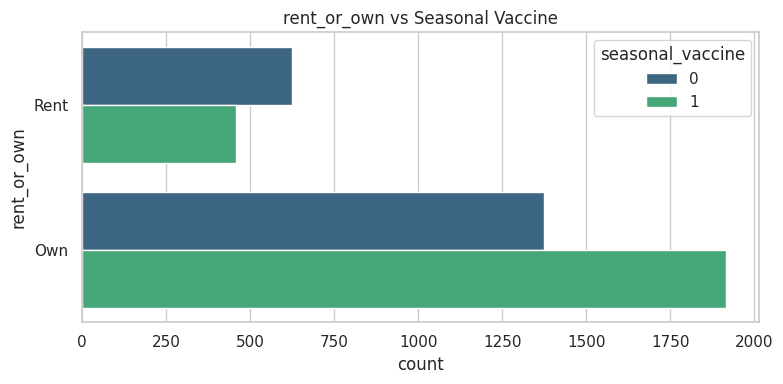

In [9]:
# -------------------------------
# 9️ Visual EDA – Categorical Variables
# -------------------------------

cat_features = ['age_group', 'education', 'income_poverty',
                'employment_status', 'rent_or_own']

for col in cat_features:
    if col in train_df.columns:
        plt.figure(figsize=(8,4))
        sns.countplot(y=col, hue='seasonal_vaccine', data=train_df, palette='viridis')
        plt.title(f"{col} vs Seasonal Vaccine")
        plt.tight_layout()
        plt.show()

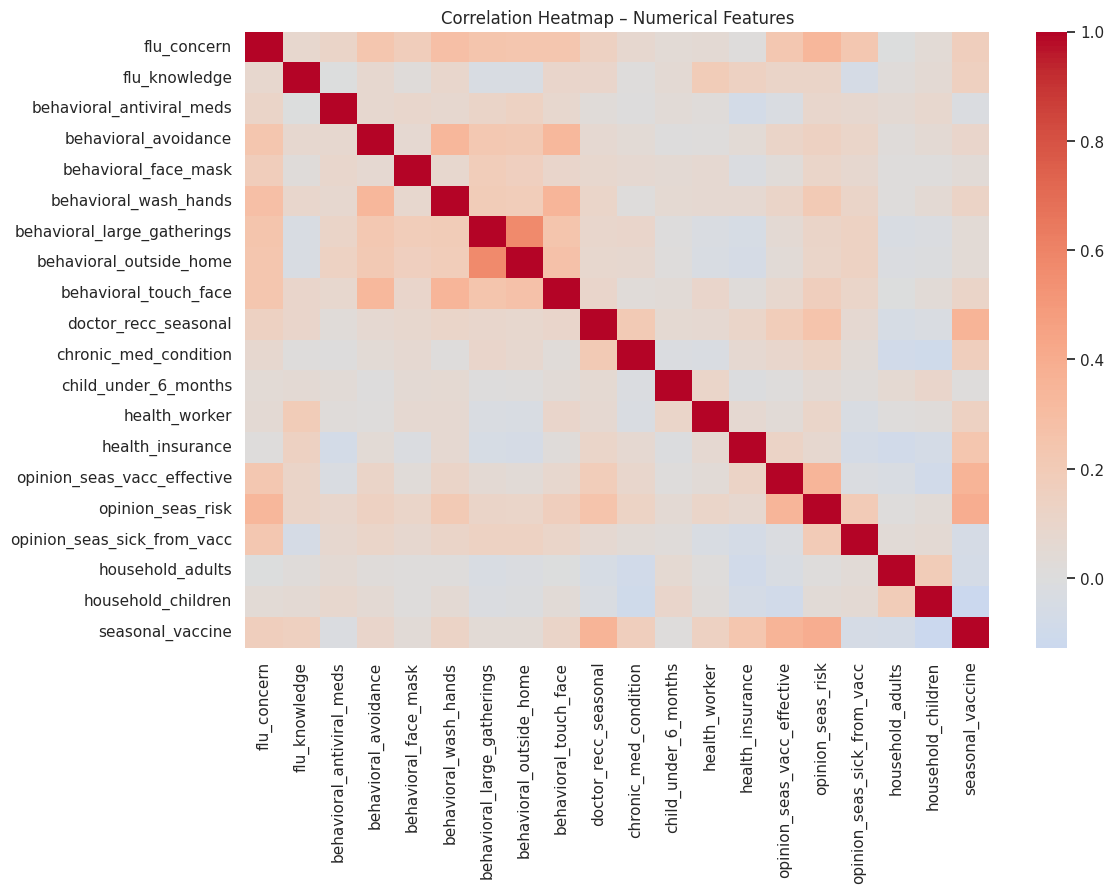

In [10]:
# -------------------------------
# 10 Correlation Heatmap (Numeric Features)
# -------------------------------

numeric_df = train_df.select_dtypes(include=['float64','int64']).drop(columns=['respondent_id'], errors='ignore')

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap – Numerical Features")
plt.show()

In [11]:
# ==============================================================
#  DATA CLEANING & PREPROCESSING

# ==============================================================

# --- import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# --- load datasets from GitHub
train_url = "https://raw.githubusercontent.com/HackTheDataUH25/data_science_challenge_2025/main/dataset_A_training.csv"
test_url  = "https://raw.githubusercontent.com/HackTheDataUH25/data_science_challenge_2025/main/dataset_A_testing.csv"

train_raw = pd.read_csv(train_url)
test_raw  = pd.read_csv(test_url)

print(" Data loaded successfully.")
print(f"Training shape: {train_raw.shape}")
print(f"Testing shape : {test_raw.shape}")

# --- make working copies
train_clean = train_raw.copy()
test_clean  = test_raw.copy()

# ==============================================================
# 1️ Missing Value Handling (Imputation)
# ==============================================================

# separate numeric & categorical columns
cat_cols = train_clean.select_dtypes(include=['object']).columns
num_cols = train_clean.select_dtypes(include=['float64', 'int64']).columns

# temporarily encode categories as numeric for imputation
train_temp = train_clean.copy()
for col in cat_cols:
    train_temp[col] = train_temp[col].astype('category').cat.codes.replace(-1, np.nan)

# initialize iterative imputer
mice_imputer = IterativeImputer(estimator=BayesianRidge(), random_state=42)

# perform imputation
imputed_array = mice_imputer.fit_transform(train_temp[num_cols.union(cat_cols)])
train_imputed = pd.DataFrame(imputed_array, columns=num_cols.union(cat_cols))

# restore id and target columns
train_imputed['respondent_id'] = train_clean['respondent_id']
train_imputed['seasonal_vaccine'] = train_clean['seasonal_vaccine']

print("\n Missing values handled using MICE (Bayesian Ridge).")
print("Remaining NaNs:", train_imputed.isna().sum().sum())

# ==============================================================
# 2️ Encoding Categorical Data
# ==============================================================

# define categorical groups
ordinal_vars = [
    'flu_concern', 'flu_knowledge',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc'
]

nominal_vars = [
    'age_group', 'education', 'race', 'sex',
    'marital_status', 'rent_or_own',
    'employment_status', 'employment_sector'
]

# encode ordinal features
lbl_encoder = LabelEncoder()
for var in ordinal_vars:
    if var in train_imputed.columns:
        train_imputed[var] = lbl_encoder.fit_transform(train_imputed[var].astype(str))

# one-hot encode nominal features
train_encoded = pd.get_dummies(train_imputed, columns=nominal_vars, drop_first=True)

print("\n Categorical encoding completed (Ordinal + One-Hot).")

# ==============================================================
# 3️ Feature Scaling & Transformation
# ==============================================================

# select numeric columns to scale (exclude ID & target)
numeric_features = [
    col for col in train_encoded.columns
    if col not in ['respondent_id', 'seasonal_vaccine']
    and train_encoded[col].dtype != 'uint8'
]

scaler = StandardScaler()
yj_transform = PowerTransformer(method='yeo-johnson')

train_scaled = train_encoded.copy()
train_scaled[numeric_features] = scaler.fit_transform(train_scaled[numeric_features])
train_scaled[numeric_features] = yj_transform.fit_transform(train_scaled[numeric_features])

print("\n Feature scaling and normalization done (Standard + Yeo-Johnson).")
print("Final dataset shape:", train_scaled.shape)

# ==============================================================
# 4️ Final Check & Output
# ==============================================================

display(train_scaled.head())



 Data loaded successfully.
Training shape: (4756, 31)
Testing shape : (4749, 30)

 Missing values handled using MICE (Bayesian Ridge).
Remaining NaNs: 0

 Categorical encoding completed (Ordinal + One-Hot).

 Feature scaling and normalization done (Standard + Yeo-Johnson).
Final dataset shape: (4756, 3557)


behavioral_antiviral_meds  behavioral_avoidance  behavioral_face_mask  \
0                  -0.234787              0.608146             -0.282778   
1                  -0.234787              0.608146             -0.282778   
2                  -0.234787              0.608146             -0.282778   
3                  -0.234787              0.608146             -0.282778   
4                  -0.234787              0.608146             -0.282778   

   behavioral_large_gatherings  behavioral_outside_home  \
0                     1.317242                -0.713333   
1                    -0.760187                -0.713333   
2                     1.317242                 1.404131   
3                    -0.760187                -0.713333   
4                     1.317242                 1.404131   

   behavioral_touch_face  behavioral_wash_hands  census_msa  \
0              -1.484883               0.443864    1.337763   
1              -1.484883              -2.254713    0.331726   
2              -1.484883               0.443864   -1.059440   
3               0.675760               0.443864   -1.059440   
4               0.675760               0.443864   -1.059440   

   child_under_6_months  chronic_med_condition  doctor_recc_seasonal  \
0             -0.364901              -0.689250             -0.807661   
1             -0.364901              -0.689250             -0.807661   
2             -0.364901              -0.689250             -0.807661   
3             -0.364901              -0.689250              0.498065   
4             -0.364901               1.508728             -0.807661   

   flu_concern  flu_knowledge  health_insurance  health_worker  \
0     0.763606      -1.868757         -1.977555      -0.412009   
1    -1.119159      -0.541826          0.626821      -0.412009   
2     0.763606      -0.541826          0.626821      -0.412009   
3    -1.119159       1.188663          0.626821      -0.412009   
4     0.763606       1.188663         -1.500077      -0.412009   

   household_adults  household_children  income_poverty  opinion_seas_risk  \
0         -1.331481           -0.651385       -0.975485           1.059042   
1          0.267727           -0.651385        0.216336           1.059042   
2          0.267727           -0.651385        0.931107          -0.815407   
3          0.267727            1.625475       -0.975485           0.355217   
4          1.381783           -0.651385        1.726867          -1.174195   

   opinion_seas_sick_from_vacc  opinion_seas_vacc_effective  respondent_id  \
0                     0.302609                     1.081630              1   
1                     1.402126                    -1.639121              2   
2                    -1.019829                    -0.426641              3   
3                    -1.019829                    -1.615012              4   
4                    -1.019829                    -1.615012              5   

   seasonal_vaccine  age_group_1.0  age_group_2.0  age_group_3.0  \
0                 0      -0.414388      -0.493355      -0.515658   
1                 0      -0.414388      -0.493355      -0.515658   
2                 0      -0.414388      -0.493355      -0.515658   
3                 1      -0.414388      -0.493355       1.939268   
4                 0      -0.414388      -0.493355       1.939268   

   age_group_4.0  education_1.0  education_1.005804729813071  \
0      -0.570876      -0.305505                    -0.014502   
1      -0.570876      -0.305505                    -0.014502   
2       1.751695      -0.305505                    -0.014502   
3      -0.570876      -0.305505                    -0.014502   
4      -0.570876      -0.305505                    -0.014502   

   education_1.0262392047375868  education_1.0292346509696686  \
0                     -0.014502                     -0.014502   
1                     -0.014502                     -0.014502   
2                     -0.014502                     -0.

In [12]:
# ==============================================================
#  DATA CLEANING & PREPROCESSING
# ==============================================================

# --- Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# --------------------------------------------------------------
# 1️⃣ Load Dataset
# --------------------------------------------------------------
train_url = "https://raw.githubusercontent.com/HackTheDataUH25/data_science_challenge_2025/main/dataset_A_training.csv"
test_url  = "https://raw.githubusercontent.com/HackTheDataUH25/data_science_challenge_2025/main/dataset_A_testing.csv"

train_raw = pd.read_csv(train_url)
test_raw  = pd.read_csv(test_url)

print(" Data successfully loaded")
print(f"Training shape : {train_raw.shape}")
print(f"Testing shape  : {test_raw.shape}")

# make safe working copies
train_df = train_raw.copy()
test_df  = test_raw.copy()

# --------------------------------------------------------------
# 2️⃣ Handle Missing Values — MICE (Bayesian Ridge)
# --------------------------------------------------------------

# Separate numeric and categorical columns
num_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = train_df.select_dtypes(include=['object']).columns.tolist()

# Temporarily encode categorical columns as numeric codes
train_temp = train_df.copy()
for col in cat_cols:
    train_temp[col] = train_temp[col].astype('category').cat.codes.replace(-1, np.nan)

# Initialize IterativeImputer (MICE)
mice = IterativeImputer(estimator=BayesianRidge(), random_state=42)
imputed_data = mice.fit_transform(train_temp[num_cols + cat_cols])
train_imputed = pd.DataFrame(imputed_data, columns=num_cols + cat_cols)

# Restore id & target columns
train_imputed['respondent_id'] = train_df['respondent_id']
train_imputed['seasonal_vaccine'] = train_df['seasonal_vaccine']

# Convert imputed categorical floats back to category codes (fixes 3557→120 issue)
for col in cat_cols:
    train_imputed[col] = np.round(train_imputed[col]).astype(int).astype(str)

print("\n Missing values imputed using MICE (Bayesian Ridge)")
print("Remaining NaNs:", train_imputed.isna().sum().sum())




 Data successfully loaded
Training shape : (4756, 31)
Testing shape  : (4749, 30)

 Missing values imputed using MICE (Bayesian Ridge)
Remaining NaNs: 0


In [13]:
# --------------------------------------------------------------
# 3️⃣ Encode Categorical Variables
# --------------------------------------------------------------

ordinal_vars = [
    'flu_concern', 'flu_knowledge',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc'
]

nominal_vars = [
    'age_group', 'education', 'race', 'sex',
    'marital_status', 'rent_or_own',
    'employment_status', 'employment_sector'
]

# Encode ordinal variables
label_encoder = LabelEncoder()
for var in ordinal_vars:
    if var in train_imputed.columns:
        train_imputed[var] = label_encoder.fit_transform(train_imputed[var].astype(str))

# One-Hot encode nominal variables
train_encoded = pd.get_dummies(train_imputed, columns=nominal_vars, drop_first=True)
print("\n Encoding completed (Ordinal + One-Hot)")
print("Encoded dataset shape:", train_encoded.shape)

# --------------------------------------------------------------
# 4️⃣ Feature Scaling & Normalization
# --------------------------------------------------------------

# Select numeric columns to scale
scale_cols = [
    col for col in train_encoded.columns
    if col not in ['respondent_id', 'seasonal_vaccine']
    and train_encoded[col].dtype != 'uint8'
]

# Apply Yeo-Johnson transform then Standard scaling
yj = PowerTransformer(method='yeo-johnson')
scaler = StandardScaler()

train_scaled = train_encoded.copy()
train_scaled[scale_cols] = yj.fit_transform(train_scaled[scale_cols])
train_scaled[scale_cols] = scaler.fit_transform(train_scaled[scale_cols])

print("\n Scaling + Normalization applied (Yeo-Johnson + StandardScaler)")
print("Final dataset shape:", train_scaled.shape)

# --------------------------------------------------------------
# 5️⃣ Final Validation
# --------------------------------------------------------------
print("\n Summary after preprocessing:")
print(f"Total rows: {train_scaled.shape[0]}")
print(f"Total columns: {train_scaled.shape[1]}")
print(f"Missing values remaining: {train_scaled.isna().sum().sum()}")

display(train_scaled.head())



 Encoding completed (Ordinal + One-Hot)
Encoded dataset shape: (4756, 58)

 Scaling + Normalization applied (Yeo-Johnson + StandardScaler)
Final dataset shape: (4756, 58)

 Summary after preprocessing:
Total rows: 4756
Total columns: 58
Missing values remaining: 0


,respondent_id,flu_concern,flu_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,seasonal_vaccine,income_poverty,census_msa,age_group_1,age_group_2,age_group_3,age_group_4,education_1,education_2,education_3,race_1,race_2,race_3,sex_1,marital_status_1,rent_or_own_1,employment_status_1,employment_status_2,employment_sector_1,employment_sector_10,employment_sector_11,employment_sector_12,employment_sector_13,employment_sector_14,employment_sector_15,employment_sector_16,employment_sector_17,employment_sector_18,employment_sector_19,employment_sector_2,employment_sector_20,employment_sector_3,employment_sector_4,employment_sector_5,employment_sector_6,employment_sector_7,employment_sector_8,employment_sector_9
0,1,0.801747,-1.995320,-0.237237,0.60705,-0.282793,0.443742,1.317032,-0.713448,-1.486668,-0.811611,-0.690536,-0.362782,-0.410226,-2.273235,0.916396,0.987923,0.611582,-1.359459,-0.653024,0,-0.892058,1.271993,-0.414388,-0.493355,-0.515658,-0.570876,-0.329583,-0.885029,-0.583825,-0.264511,-0.267231,0.512717,1.187663,1.081530,1.796540,-0.815638,-0.22748,-0.19603,-0.366061,-0.497633,-0.291297,-0.238514,-0.095518,-0.176066,-0.10514,-0.095518,-0.10514,-0.189578,-0.284013,-0.213318,-0.135703,-0.020511,13.756453,-0.134898,-0.146553,-0.281846,-0.420984
1,2,-1.011015,-0.503630,-0.237237,0.60705,-0.282793,-2.257439,-0.760287,-0.713448,-1.486668,-0.811611,-0.690536,-0.362782,-0.410226,0.629413,-1.995944,0.987923,1.174741,0.297254,-0.653024,0,-0.892058,0.428808,-0.414388,-0.493355,-0.515658,-0.570876,-0.329583,-0.885029,1.712843,-0.264511,-0.267231,0.512717,1.187663,1.081530,1.796540,-0.815638,-0.22748,-0.19603,-0.366061,-0.497633,-0.291297,4.192627,-0.095518,-0.176066,-0.10514,-0.095518,-0.10514,-0.189578,-0.284013,-0.213318,-0.135703,-0.020511,-0.072693,-0.134898,-0.146553,-0.281846,-0.420984
2,3,0.801747,-0.503630,-0.237237,0.60705,-0.282793,0.443742,1.317032,1.403930,-1.486668,-0.811611,-0.690536,-0.362782,-0.410226,0.629413,-0.126961,-0.511529,-1.095125,0.297254,-0.653024,0,0.970687,-1.085443,-0.414388,-0.493355,-0.515658,1.751695,-0.329583,1.129906,-0.583825,-0.264511,-0.267231,0.512717,1.187663,-0.924616,-0.556626,1.226033,-0.22748,-0.19603,-0.366061,-0.497633,-0.291297,4.192627,-0.095518,-0.176066,-0.10514,-0.095518,-0.10514,-0.189578,-0.284013,-0.213318,-0.135703,-0.020511,-0.072693,-0.134898,-0.146553,-0.281846,-0.420984
3,4,-1.011015,1.164575,-0.237237,0.60705,-0.282793,0.443742,-0.760287,-0.713448,0.675106,0.573165,-0.690536,-0.362782,-0.410226,0.629413,-1.951921,0.566166,-1.095125,0.297254,1.608931,1,-0.892058,-1.085443,-0.414388,-0.493355,1.939268,-0.570876,-0.329583,1.129906,-0.583825,-0.264511,-0.267231,0.512717,1.187663,-0.924616,-0.556626,-0.815638,-0.22748,-0.19603,-0.366061,-0.497633,-0.291297,-0.238514,-0.095518,-0.176066,-0.10514,-0.095518,-0.10514,5.274869,-0.284013,-0.213318,-0.135703,-0.020511,-0.072693,-0.134898,-0.146553,-0.281846,-0.420984
4,5,0.801747,1.164575,-0.237237,0.60705,-0.282793,0.443742,1.317032,1.403930,0.675106,-0.811611,1.504999,-0.362782,-0.410226,-1.571157,-1.951921,-1.536405,-1.095125,1.358246,-0.653024,0,1.542610,-1.085443,-0.414388,-0.493355,1.939268,-0.570876,-0.329583,-0.885029,-0.583825,-0.264511,-0.267231,0.512717,-0.841990,1.081530,1.796540,1.226033,-0.22748,-0.19603,2.731782,-0.497633,-0.291297,-0.238514,-0.095518,-0.176066,-0.10514,-0.095518,-0.10514,-0.189578,-0.284013,-0.213318,-0.135703,-0.020511,-0.072693,-0.134898,-0.146553,-0.281846,-0.420984
